# Mini Projeto 3

## implementação de uma MLP usando Pytorch

Neste projeto, implementei uma Multi-Layer Perceptron (MLP) usando PyTorch para classificar a base de dados MNIST.

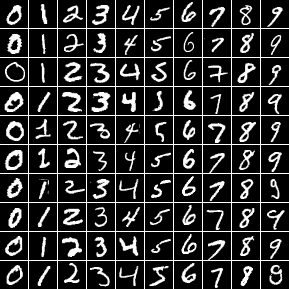